<p><font size="6"><b>Projet Machine Learning - IA SCHOOL </b></font></p>


> *Sentiment des compagnies aériennes américaines sur Twitter*   
> *January, 2022*

---

![](assets/sentiment.png)

### Description

Ce fichier est celui d’une étude portant sur les données de sentiment Twitter des compagnies aériennes. Le but du projet est d'analyser comment les voyageurs, en février 2015, ont exprimé leurs sentiments sur Twitter sur les problèmes de chaque grande compagnie aérienne américaine. Nous classerons d'abord les tweets positifs, négatifs et neutres, puis nous catégoriserons les raisons négatives (telles que "vol tardif" ou "service grossier").

#### Variables prédictives  => `Features : Caractéristiques ou variables à étudier`

`tweet_id`: l'identifiant du tweet

`airline_sentiment_confidence`: 

`negativereason`: les raisons négatives

`negativereason_confidence` : 

`airline`: le nom de la compagnie aérienne

`airline_sentiment_gold`: 

`name`: le nom de celui qui tweete (user)

`negativereason_gold`:

`retweet_count`: le nombre de retweet

`text`: le contenu du tweet

`tweet_coord` : les coordonnées GPS de l'endroit depuis lequel l'utilisateur a tweeté
    
`tweet_created` : la date et l'heure de création du tweet

`tweet_location` : le lieu depuis lequel l'utilisateur a tweeté (USA, France, ...)
    
`user_timezone `: le fuseau horaire

#### Variable à prédire

`airline_sentiment`: le sentiment de la compagnie aérienne (positive, negative ou neutral)

Tout d’abord, nous allons importer les modules `numpy`, `pandas`, `matplotlib.pyplot` et `sklearn `(uniquement les éléments dont on a besoin), ensuite on charge le fichier csv comprenant les données. Puis, on affiche les dix premiers enregistrements de l’ensemble des données à l’aide de la fonction `head()` afin d’avoir une idée sur le dataset.

#### Importation des libraries

In [81]:
# Nous commençons par importer les libraries que nous utiliserons tout au long de cette analyse

import pandas as pd # librairie pour lecture et manipulation de donnée

import numpy as np # notre fameuse numpy pour le calcul numérique

import matplotlib.pyplot as plt # pour les visualisations

from sklearn.model_selection import train_test_split
from sklearn import linear_model

# import seaborn
import seaborn as sns

#### Lecture de la base de donnée

In [82]:
data = pd.read_csv("data/Tweets.csv")

Un aperçu des 5 premiers enregistrements:

In [83]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [84]:
data.columns = [col.replace(":", "_") for col in data.columns]

columns_to_keep = ["tweet_id"] + [col for col in data.columns if col[0]!="_" and col!="tweet_id"]

data = data[columns_to_keep]

data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


La première étape consistera à déterminer la forme ou la structure du dataset, puis à vérifier le nombre de valeurs nulles dans chaque colonne.

In [85]:
print('Shape: ', data.shape)

Shape:  (14640, 15)


Au total, 15 variables ont été recueillies pour 14640 tweets dans l'étude.

Ensuite, nous identifierons les différents types de données présents dans notre jeu de données.

In [86]:
#### Types des variables 
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

### Gestion des valeurs manquantes

Nous allons d'abord identifier le nombre de valeurs manquantes présentes dans l'ensemble de données. De cette façon, nous pouvons comprendre les colonnes redondantes ou inutiles dans l'ensemble de données, selon la colonne qui a le nombre maximum de valeurs nulles.

In [87]:
print("Le nombre de valeurs nulles dans chaque colonne est \n", data.isna().sum())

Le nombre de valeurs nulles dans chaque colonne est 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


Afin d'obtenir une meilleure estimation et de l'analyser efficacement, nous calculerons le pourcentage de valeurs nulles ou de valeurs NA dans chaque colonne.

In [88]:
print("Le pourcentage de valeurs nulles ou NA dans l'ensemble de données")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Le pourcentage de valeurs nulles ou NA dans l'ensemble de données


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

Il est donc maintenant évident que 90 % des données des colonnes `tweet_coord` , `airline_sentiment_gold`, `negativereason_gold` sont manquantes. Par conséquent, il serait préférable de supprimer ces colonnes car elles ne fourniront aucune information utile sur notre modèle.

In [89]:
data.drop(["tweet_coord", "airline_sentiment_gold", "negativereason_gold"],axis=1, inplace = True)
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Data Visualization - Analyse univariée et multivariée

Tout d'abord, nous allons visualiser la distribution de la principale variable dépendante, qui est le `sentiment de la compagnie aérienne`, ainsi que sa `longueur de tweet ` et sa `répartition entre les compagnies aériennes`.

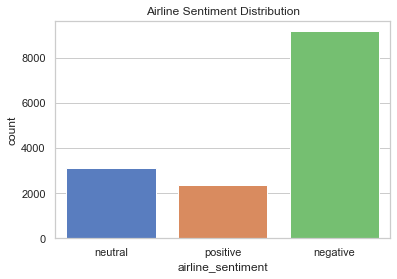

In [90]:
sns.set(style="whitegrid")
sns.countplot(x=data["airline_sentiment"], palette="muted")
plt.title("Airline Sentiment Distribution")
plt.show()

On observe que la majorité des commentaires sont `négatifs`. Ce qui pourrait signifier que les gens sont généralement insatisfaits du service fourni par les compagnies aériennes.

Nous allons maintenant analyser la répartition des `différents types de compagnies aériennes`.

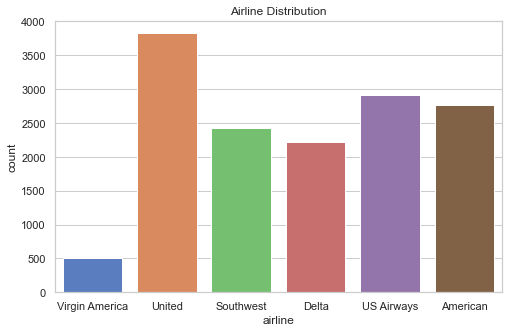

In [91]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x=data["airline"], palette="muted")
plt.title("Airline Distribution")
plt.show()

D'après le diagramme en barres ci-dessus, il est évident que `United Airlines` est largement reconnue sur Twitter. Bien sûr, nous ne savons pas si cette popularité est positive ou négative. En dehors de cela, le fait qu'il y ait très peu de tweets dans `Virgin America` donne également l'impression que leur standard n'est peut-être ni bon ni mauvais.

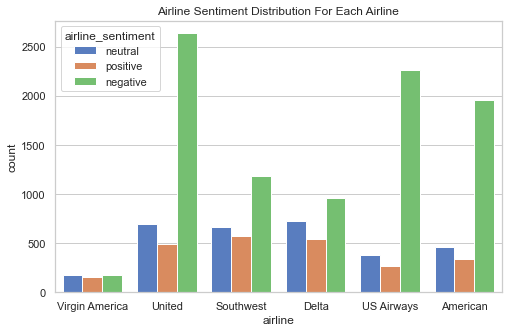

In [92]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x=data["airline"], hue=data["airline_sentiment"], palette="muted")
plt.title("Airline Sentiment Distribution For Each Airline")
plt.show()

Comme nous pouvons le voir sur le graphique ci-dessus, les `sentiments de la compagnie aérienne ` varient considérablement selon la `compagnie aérienne`. Le plus positif est `Virgin America`, tandis que le plus négatif est `United ` compte tenu du sentiment général.

Nous allons maintenant définir un nouveau paramètre `'tweet_len'` qui nous indiquera la longueur du tweet présent dans la colonne `'text'` de notre dataset.

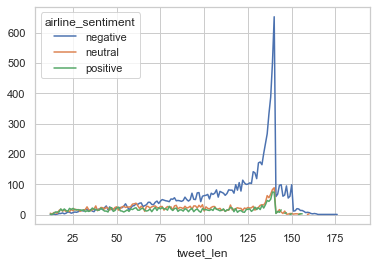

In [93]:
data['tweet_len'] = data['text'].apply(len)
df= data.groupby(['tweet_len', 'airline_sentiment']).size().unstack().plot(kind='line', stacked=False)

Il n'y a pas beaucoup de lien entre le nombre de tweets positifs/neutres et la durée du tweet. Cependant, dans le cas des tweets négatifs, la diffusion est fortement biaisée vers des tweets plus longs. C'est plausible car plus la personne qui tweete est en colère, plus elle a à dire.

Nous allons maintenant analyser le `nombre de différents types de raisons négatives` pour lesquelles les clients ont envoyé un tweet négatif.

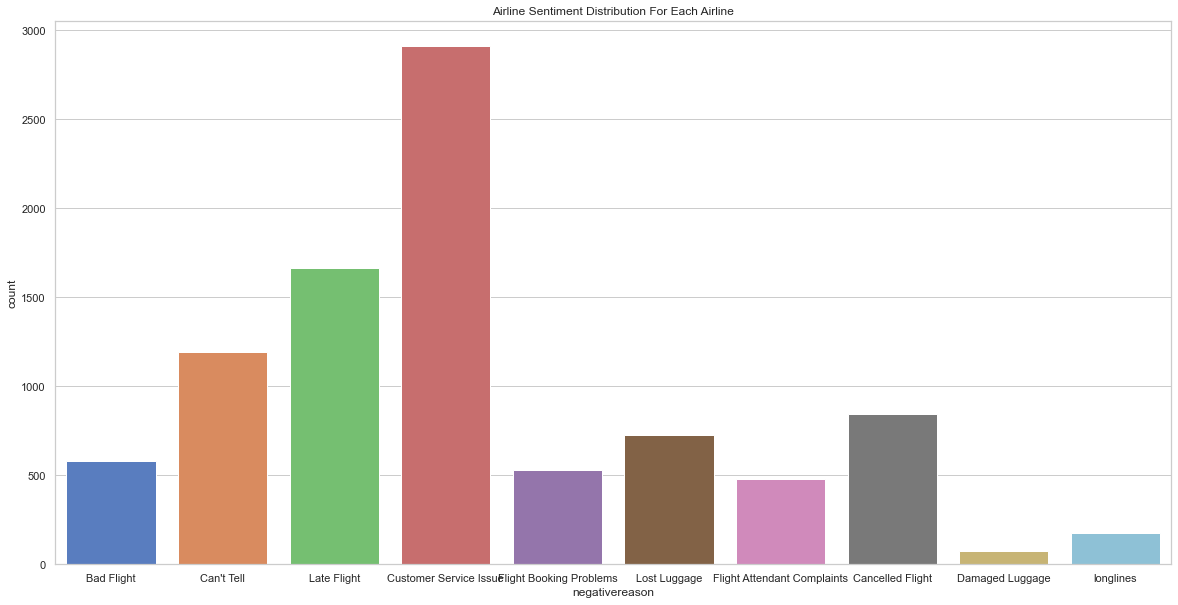

In [94]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x=data["negativereason"], palette="muted")
plt.title("Airline Sentiment Distribution For Each Airline")
plt.show()

Le graphique à barres ci-dessus montre que, un très grand nombre de personnes ont expliqué leur tweet négatif comme étant un `mauvais service client` (Customer Service Issue). Donc, la raison la plus importante d'un mauvais vol est due à un service client (pas si bon pour les compagnies).

## Prétraitement du texte

Dans cette partie, nous traiterons la colonne nommée `'Text'` qui contient le texte brut des tweets postés par les clients.

Nous effectuerons essentiellement le prétraitement du texte en utilisant la bibliothèque bien connue `nltk`.

In [95]:
import nltk
import re
import sklearn

Nous allons créer un nouveau dataset contenant seulement deux colonnes qui sont `airline_sentiment` et `text`.

In [96]:
tweet_senti = data[['airline_sentiment','text']]
tweet_senti.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Nous devons nettoyer la colonne `text`. Le nettoyage peut être effectué par :

- Conversion de tous les caractères en minuscules.
- Suppression de caractères en dehors de A-Z et a-z.
- Suppression des hashtags #.
- Remplacer le type d'URL 'https://' par un simple 'lien'

In [97]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

wordnet = WordNetLemmatizer()
ps = PorterStemmer()
corpus = []
for i in range(0, len(tweet_senti)):
    sntm= re.sub('[^a-zA-Z]', ' ', tweet_senti['text'][i])
    sntm = sntm.lower()
    sntm = sntm.split()
    sntm = re.sub(r'#([^\s]+)', r'\1', tweet_senti['text'][i])
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','link',tweet_senti['text'][i])
    #sntm = [ps.stem(word) for word in sntm if not word in set(stopwords.words('english'))]
    #sntm = ' '.join(sntm)
    corpus.append(sntm)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Nous devons maintenant remplacer cette colonne `'text'` du dataframe `tweet_senti` par les nouvelles valeurs de la liste `corpus`.

In [98]:
tweet_senti['newtext']= corpus
tweet_senti.drop(["text"],axis=1, inplace = True)

<ipython-input-98-17cd1fb954c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_senti['newtext']= corpus
C:\Users\niang\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
tweet_senti

,airline_sentiment,newtext
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


## Fractionnement du dataset en dataset d'apprentissage et dataset de test

Nous n'avons pas besoin du reste des colonnes dans le dataset global, nous n'utiliserons donc que les deux colonnes pertinentes qui sont `'newtext'` et `'airline_sentiment'` et en ferons le nouveau dataframe.

In [158]:
df = tweet_senti[['newtext','airline_sentiment']]
df

,newtext,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


Nous diviserons le dataset `df` en ensemble d'entraînement et ensemble de test, où `80 %` seront dans l'ensemble d'apprentissage et `20 %` seront dans l'ensemble de test.

In [159]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=0.1,random_state=10)

Nous allons maintenant convertir l'ensemble d'apprentissage et l'ensemble de test en fichiers csv qui seront importés ultérieurement pour la construction du modèle.

In [160]:
df_train.to_csv('tweet_train.csv')
df_test.to_csv('tweet_test.csv')

## Régression Logistique

Nous allons construire et former un modèle qui peut prédire si une phrase a des sentiments positifs, négatifs ou neutres. Par exemple, `"C'est terrible et je suis déçu"` devrait être prédit comme négatif et `"Je suis content"` devrait être prédit comme positif.

Pour notre modèle, notre entrée envisagée serait un ensemble de texte, et notre sortie envisagée serait une liste de prédictions pour les sentiments de chaque texte. En tant que tel, nous devons d'abord séparer les variables X (prédictives) et la variable y (target).

**Label Encoding** pour la variable `airline_sentiment`

In [162]:
df["airline_sentiment"] = df["airline_sentiment"].astype('category')
df["airline_sentiment"] = df["airline_sentiment"].cat.codes
df

,newtext,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica plus you've added commercials t...,2
2,@VirginAmerica I didn't today... Must mean I n...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
...,...,...
14635,@AmericanAir thank you we got on a different f...,2
14636,@AmericanAir leaving over 20 minutes Late Flig...,0
14637,@AmericanAir Please bring American Airlines to...,1
14638,"@AmericanAir you have my money, you change my ...",0


In [163]:
y = df["airline_sentiment"] 
X = df["newtext"]

### Conversion de texte en vecteurs à l'aide de `Sklearn TfidfVectorizer`

À partir de maintenant, X contient une liste de chaînes de caractères. Nos modèles d'apprentissage automatique ne peuvent pas comprendre ces chaînes brutes, nous devons donc d'abord convertir chaque chaîne en vecteur . 

Pour convertir les textes bruts en vecteurs, nous pouvons utiliser `TfidfVectorizer de Sklearn`.

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

Nous devons convertir le vecteur `X` en un tableau régulier afin que notre modèles puissent les traiter.

In [165]:
X = X.toarray()

### Construire et former notre modèle de classification

In [166]:
from sklearn.model_selection import train_test_split

#fractionner dataset (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25, 
                                                    random_state = 0)

Après notre fractionnement de test et de train, nous allons construire et former notre modèle. Nous utilisons simplement l'algorithme de `régression logistique`.

In [167]:
from sklearn.linear_model import LogisticRegression

#instanciation du modèle
model = LogisticRegression()

#training
model.fit(X_train, y_train)

LogisticRegression()

### Évaluation de notre modèle

In [168]:
#calcule de précision : Mesure des performances du modèle
score = model.score(X_test, y_test)
print(score)

0.8005464480874317


Il renvoie une précision de `80 %`, ce qui est plutôt correct, étant donné que nous n'avons effectué aucun prétraitement de données supplémentaire ! Nous pouvons tester cela davantage en saisissant nos propres cas de test. Notez que nous devons d'abord le transformer en vecteurs en utilisant notre objet `TfidfVectorizer vec`.

In [169]:
test = [
    "This is terrible and I am disappointed",
    "I am happy ",
    "Never going to buy from this store ever again",
    "Works pretty well",
    "meh"
]
x_test = vec.transform(test)
predictions = model.predict(x_test.toarray())
predictions

# Résultat des prédictions
array([0, 2, 0, 2, 1], dtype=int8)

array([0, 2, 0, 2, 1], dtype=int8)

Comme nous pouvons l'observer ici, les sentiments prédits par notre modèle sont assez précis dans une certaine mesure !

## Random Forest

#### A - Import la classe RandomForestClassifier

Importer la classe `RandomForestClassifier` à partir du module ensemble de `sklearn`.

In [194]:
# Importer la classe RandomForestClassifier issue du module sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

#### B - Préparation du jeu de données pour l'entrainement de random forest

Nous devons séparer le jeu de données en variables descriptives à mettre en entrée de la prédiction (dans la variable `X`) et la variable cible, celle de la sortie à prédire (variable `y`).

In [195]:
df = tweet_senti[['newtext','airline_sentiment']]
X = df["newtext"]
y = df["airline_sentiment"] 

#### C - Conversion de texte en vecteurs à l'aide de `Sklearn TfidfVectorizer`

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

X = X.toarray()

Séparer enfin le jeu de données (X et y) et données d'entraînement et de test. On choisit ici `random_state=42`.

In [197]:
# séparation de X et y en jeu de données d'entrainement et de test avec la fonction train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Créons une forêt d'arbres de décision `RandomForestClassifier` et l'entraînons.

**/!\** Utilisons le paramètre **random_state=42** pour pouvoir comparer nos résultats entre nous.

Ex : `RandomForestClassifier(random_state=42)`

In [198]:
# création d'un forêt aléatoire d'arbres de décision (random forest) dans la variable : rf
rf = RandomForestClassifier(random_state=42)

In [199]:
# Entrainement de la forêt sur le jeu de données d'entraînement 
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#### D - Evaluation de la qualité des résultats fournis par notre Random Forest

**Méthode 1** \
Dans cette dernière partie, nous allons évaluer la qualité du Random Forest construit au regard de la tâche de séparation des 3 types de sentiment (positive, negative ou neutral). Pour ce faire, nous allons utiliser la partie du jeu de donnés qui n'a pas été utilisée pendant l'entraînement de l'arbre de décision `X_test` pour : 
- réaliser une prédiction avec (`y_predict`)  
- et évaluer la similitude entre `y_predict` et `y_test` 

Pour réaliser une prédiction, il faut appeler la méthode `predict` de l'arbre en lui passant en paramètre `X_test` : 

In [200]:
# mettre le résultat méthode prédict appliquée au dataset de test dans une nouvelle variable y_predict
y_predict = rf.predict(X_test)

Dans le cas de méthodes de classification, l'évaluation de la qualité (ou de la méthode de prédiction en général) se fait au moyen de la fonction `accuracy_score` du module metrics de sklearn. Elle prend en paramètre y_test et y_predict et retourne un score entre 0 et 1 correspondant à la fraction d'exemples correctement classifiés.

In [201]:
## importer les fonctions confusion_matrix et accuracy_score depuis le module sklearn.metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report,classification_report

In [202]:
# utiliser la fonction accuracy_score avec en paramètre y_test et y_predict
acc_score = accuracy_score(y_test, y_predict)
print('Accuracy_score: ',acc_score)
print("-"*60)
cr = classification_report(y_test, y_predict)
print(cr)

Accuracy_score:  0.7622950819672131
------------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.76      0.97      0.86      2340
     neutral       0.69      0.37      0.49       738
    positive       0.84      0.41      0.55       582

    accuracy                           0.76      3660
   macro avg       0.77      0.59      0.63      3660
weighted avg       0.76      0.76      0.73      3660



La précision du modèle est de `76 %`, ce qui est considéré comme bon.

Pour aller plus loins dans l'analyse, il est aussi possible d'utiliser la fonction `confusion_matrix` du module metrics de sklearn (`metrics.sklearn`). Elle retourne un tableau où chaque ligne correspond à la classe prédite et chaque colonne à la vraie classe.

Pour que toutes les classes soient correctement classifiées, il faut qu'il n'y ait que des éléments sur la diagonale. 

In [203]:
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix

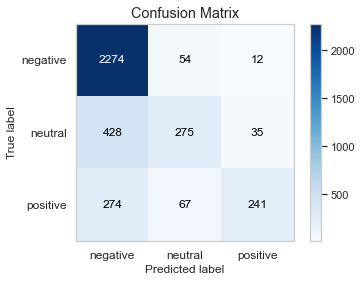

In [204]:
!pip install scikit-plot
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test, y_predict)

**Méthode 2** \
On peut également obtenir le score de performance du Random Forest grâce à la méthode `score` de `dt`. Cette méthode prend en paramètre `X_test` et `y_test` et retourne le même score d'accuracy que précédemment. On peut donc faire le même calcul en 1 seule ligne au lieu de 2.

In [205]:
# utiliser la méthode score de l'objet rf avec en paramètres X_test et y_test
rf.score(X_test,y_test)

0.7622950819672131

## Classification Naive Bayes

Le Théorème de Bayes :

![](assets/Bayes_formule.jpg)

Il existe des classificateurs populaires sous Naive Bayes : 

* **Bernoulli Naive Bayes**
* **Gaussian Naive Bayes classifier**
* **Multinomial Naive Bayes**

Nous utiliserons le classificateur `Multinomial Naive Bayes`.

In [211]:
df = tweet_senti[['newtext','airline_sentiment']]
X = df["newtext"]
y = df["airline_sentiment"] 

In [212]:
df["airline_sentiment"] = df["airline_sentiment"].astype('category')
df["airline_sentiment"] = df["airline_sentiment"].cat.codes

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(X)

X = X.toarray()

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=69)  

In [215]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (11712, 15061)
X_test_shape :  (2928, 15061)
y_train_shape :  (11712,)
y_test_shape :  (2928,)


In [216]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

**Afficher la matrice de confusion :** 

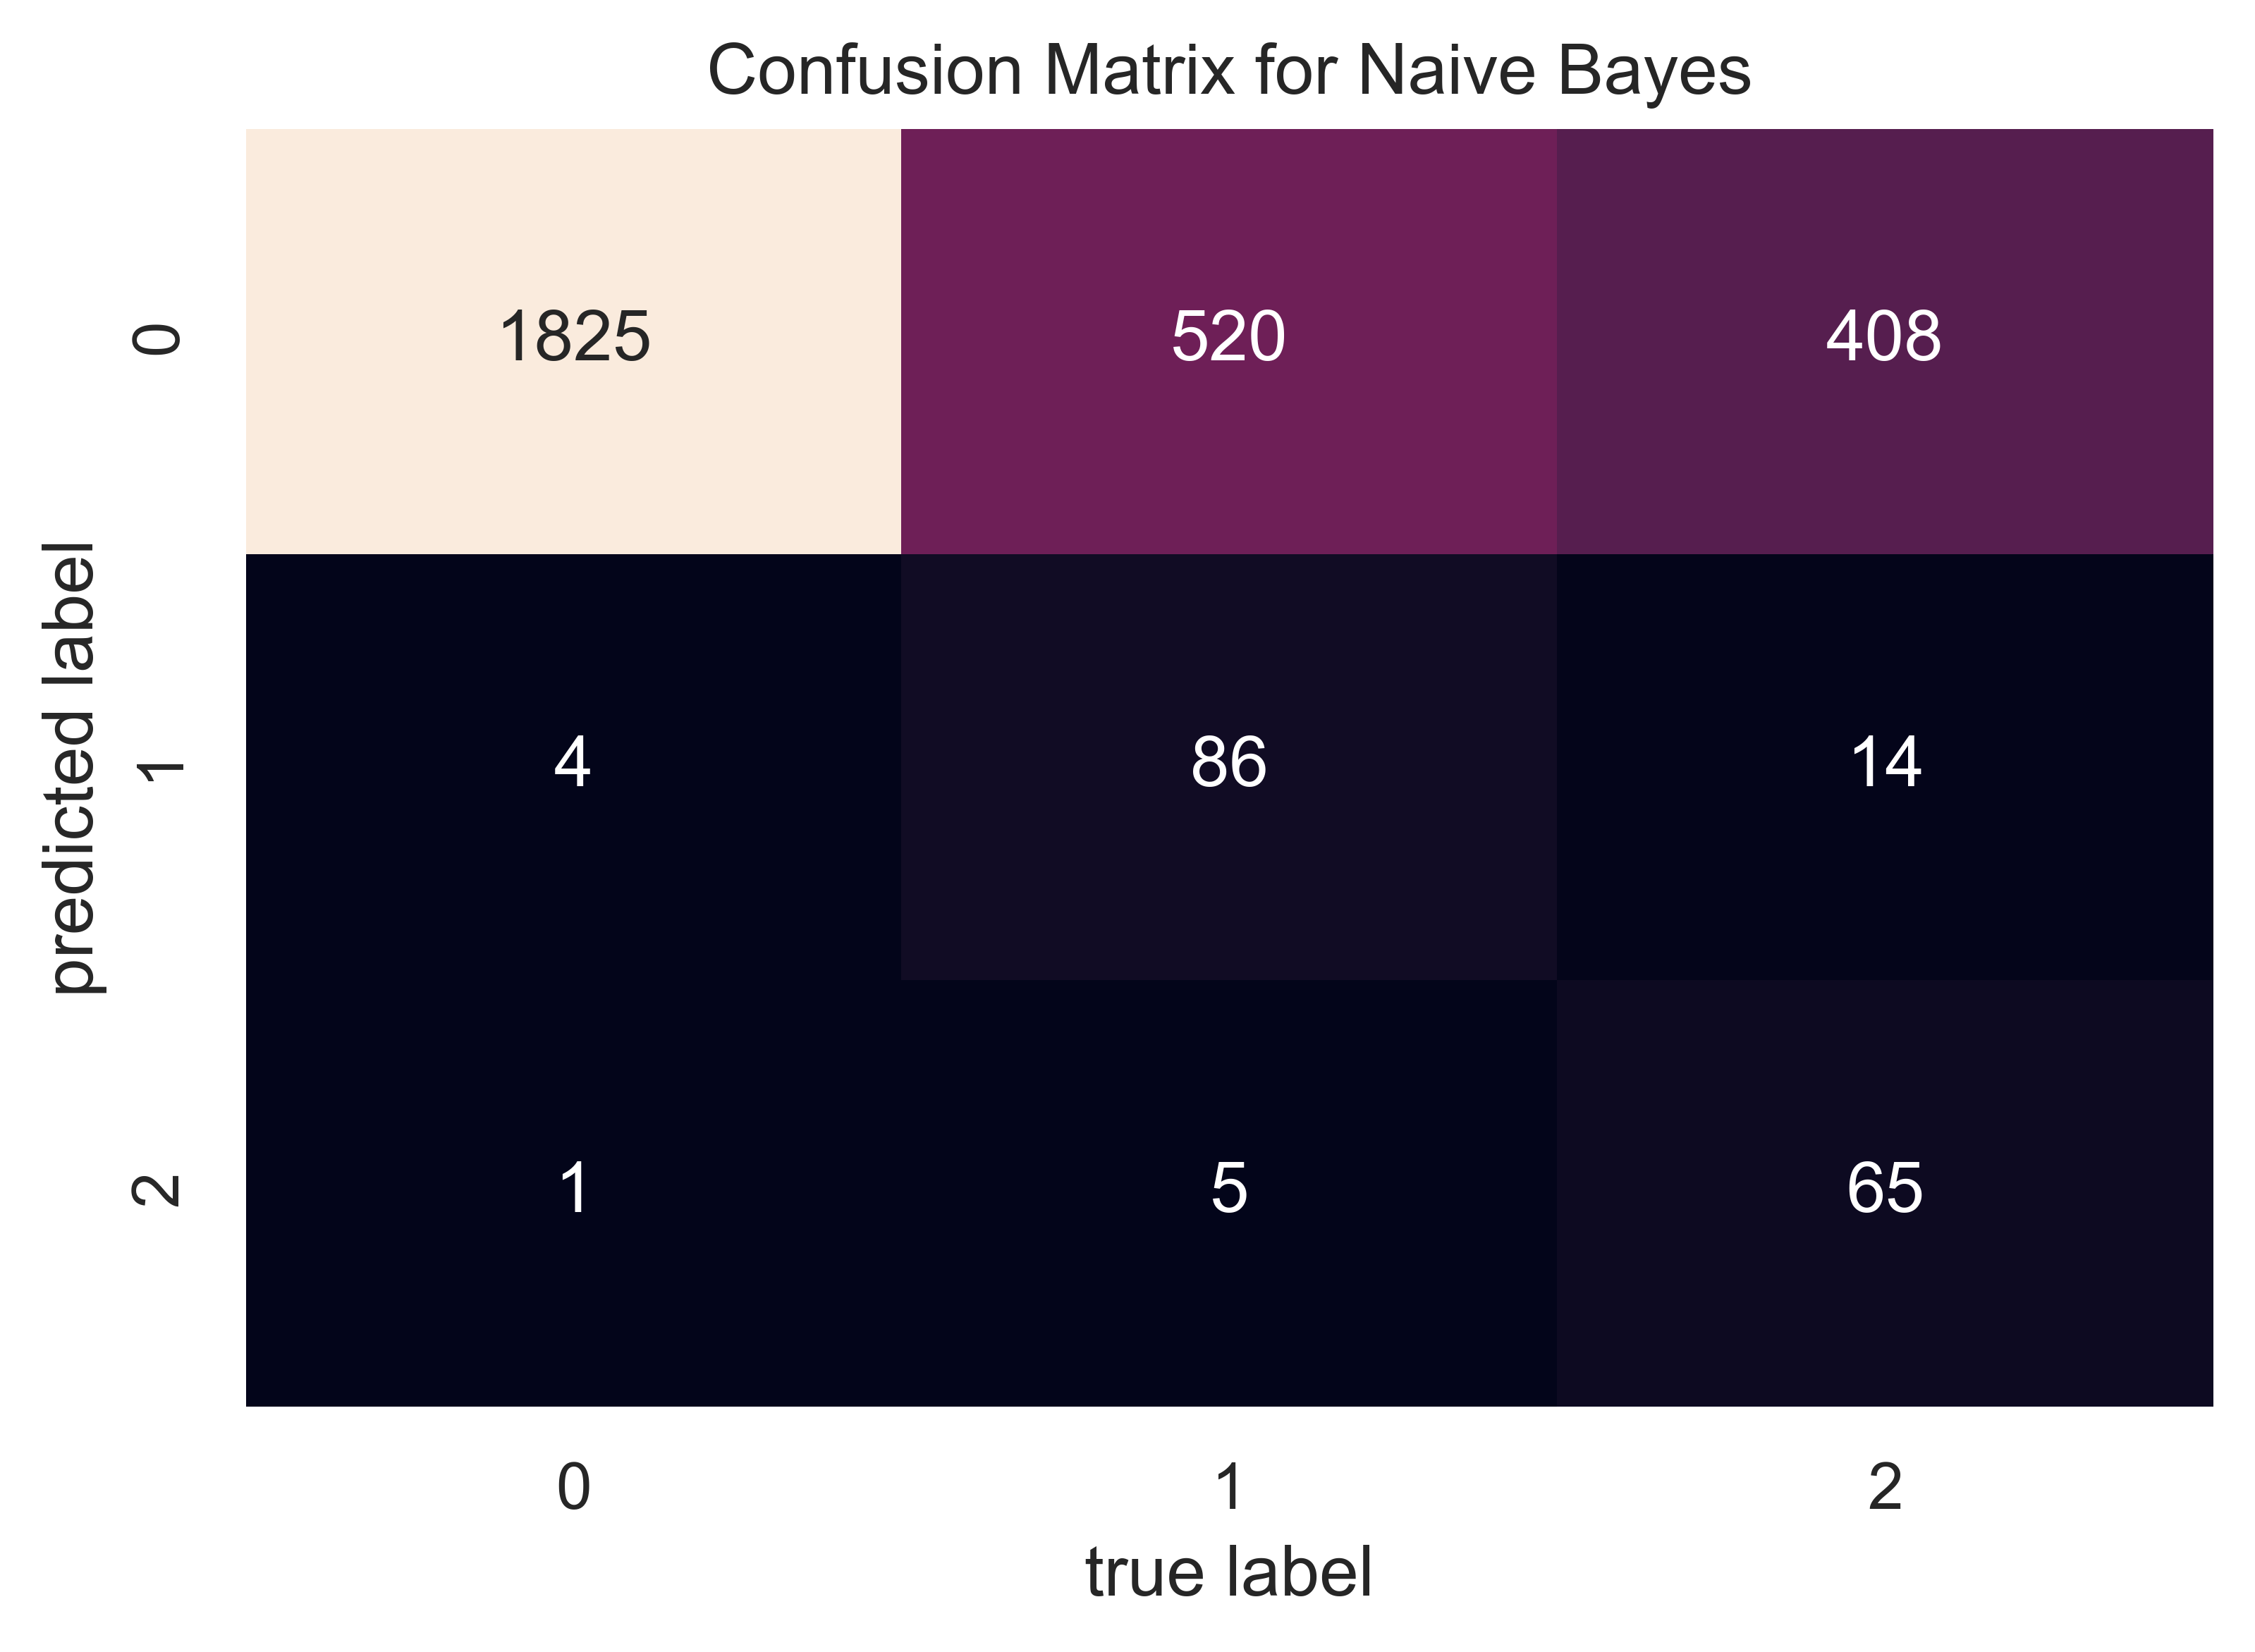

In [217]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("assets/confusion_matrix.png")
plt.show()

**Découvrons la précision `accuracy` de notre prédiction :**

In [219]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.674863387978142


##### `Precision`, `Recall`, et `Accuracy ` sont des mesures standard utilisées pour évaluer les performances d'un classifieur.


##### Le plus souvent, `precision` et `recall` sont utilisés pour mesurer les performances, car `accuracy` seule ne dit pas grande chose sur la qualité d'un classificateur.

In [220]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

    negative       0.66      1.00      0.80      1830
     neutral       0.83      0.14      0.24       611
    positive       0.92      0.13      0.23       487

    accuracy                           0.67      2928
   macro avg       0.80      0.42      0.42      2928
weighted avg       0.74      0.67      0.59      2928



## Conclusion

- L’ensemble des données de train utilisé pour former les modèles fournit une bonne prédiction pour les sentiments des compagnies aériennes américaines sur Twitter, qu’ils soient positifs, négatifs ou neutres.


- La précision de la prédiction est d’environ 70% , ce qui est considéré comme bon.


- La majorité des commentaires sont négatifs.


- La raison la plus importante d’un mauvais vol est due à un service client.


- D’où la nécessité de bien former le service des relations clients pour améliorer la satisfaction des voyageurs.